In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import tensorflow as tf

In [3]:
import glob

In [4]:
all_files = glob.glob('./ipl_csv2/*.csv')
df_from_each_file = (pd.read_csv(f) for f in all_files)
df = pd.concat(df_from_each_file, ignore_index=True)

In [5]:
df.dtypes

match_id                    int64
season                     object
start_date                 object
venue                      object
innings                     int64
ball                      float64
batting_team               object
bowling_team               object
striker                    object
non_striker                object
bowler                     object
runs_off_bat                int64
extras                      int64
wides                     float64
noballs                   float64
byes                      float64
legbyes                   float64
penalty                   float64
wicket_type                object
player_dismissed           object
other_wicket_type         float64
other_player_dismissed    float64
dtype: object

In [6]:
df['season'].unique()

array([2017, 2018, 2019, '2020/21', 2021, '2007/08', 2009, '2009/10',
       2011, 2012, 2013, 2014, 2015, 2016], dtype=object)

In [7]:
df.drop(['other_player_dismissed','other_wicket_type', 'penalty','player_dismissed','start_date'], axis=1, inplace=True)

In [8]:
df.dtypes

match_id          int64
season           object
venue            object
innings           int64
ball            float64
batting_team     object
bowling_team     object
striker          object
non_striker      object
bowler           object
runs_off_bat      int64
extras            int64
wides           float64
noballs         float64
byes            float64
legbyes         float64
wicket_type      object
dtype: object

In [9]:
df['total_runs'] = df.iloc[:,-7:-2].sum(axis=1)

In [10]:
df.drop(['runs_off_bat','wides','noballs','extras','byes','legbyes'],axis=1, inplace=True)

In [11]:
df.dtypes

match_id          int64
season           object
venue            object
innings           int64
ball            float64
batting_team     object
bowling_team     object
striker          object
non_striker      object
bowler           object
wicket_type      object
total_runs      float64
dtype: object

In [12]:
df['year'] = df['season'].astype(str).str.slice(0,4).astype(int)

In [13]:
df['year'].unique()

array([2017, 2018, 2019, 2020, 2021, 2007, 2009, 2011, 2012, 2013, 2014,
       2015, 2016], dtype=int64)

In [14]:
df.drop('season',inplace=True,axis=1)

In [15]:
df.dtypes

match_id          int64
venue            object
innings           int64
ball            float64
batting_team     object
bowling_team     object
striker          object
non_striker      object
bowler           object
wicket_type      object
total_runs      float64
year              int32
dtype: object

In [16]:
df['innings'].unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [17]:
df['batting_team'].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Delhi Capitals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants'], dtype=object)

In [18]:
df['batting_team'] = df['batting_team'].replace(['Delhi Daredevils'],'Delhi Capitals')
df['bowling_team'] = df['bowling_team'].replace(['Delhi Daredevils'],'Delhi Capitals')
df['batting_team'] = df['batting_team'].replace(['Kings XI Punjab'],'Punjab Kings')
df['bowling_team'] = df['bowling_team'].replace(['Kings XI Punjab'],'Punjab Kings')

In [19]:
current_teams = ['Sunrisers Hyderabad', 'Royal Challengers Bangalore', 'Mumbai Indians', 'Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals', 'Delhi Capitals', 'Punjab Kings']

In [20]:
df = df[(df['batting_team'].isin(current_teams)) &(df['bowling_team'].isin(current_teams))]

In [21]:
data1 = df.groupby(['match_id','innings'])['striker','non_striker'].apply(lambda x: list(np.unique(x)))
data1 = data1.to_frame('batsmen')
#data1['batsmen'] = str(data1['batsmen'])[1:-1]

In [22]:
data2 = df.groupby(['match_id','innings'])['bowler'].apply(lambda x: list(np.unique(x)))
data2 = data2.to_frame('bowlers')
#data2['bowlers'] = str(data2['bowlers'])[1:-1]

In [23]:
len(data2)

1293

In [105]:
current_players= pd.read_csv('./playersList.csv')

In [107]:
current_players.head()

,Players
0,AM Rahane
1,RA Tripathi
2,MJ McClenaghan
3,SPD Smith
4,SL Malinga


In [108]:
current_players['Players'][0]

'AM Rahane'

In [ ]:
df = df[(df['current_players'].isin(current_players))]

In [24]:
df = df[df['ball'] <=6.0]

#

In [25]:
len(data1)

1293

In [26]:
len(df)

47466

In [27]:
df.dtypes

match_id          int64
venue            object
innings           int64
ball            float64
batting_team     object
bowling_team     object
striker          object
non_striker      object
bowler           object
wicket_type      object
total_runs      float64
year              int32
dtype: object

In [28]:
#df.drop('venue', axis=1, inplace=True)

In [29]:
df.dtypes

match_id          int64
venue            object
innings           int64
ball            float64
batting_team     object
bowling_team     object
striker          object
non_striker      object
bowler           object
wicket_type      object
total_runs      float64
year              int32
dtype: object

In [30]:
df['innings'].unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [31]:
df['venue'].unique()

array(['Rajiv Gandhi International Stadium, Uppal',
       'M.Chinnaswamy Stadium', 'Wankhede Stadium',
       'Holkar Cricket Stadium', 'Eden Gardens', 'M Chinnaswamy Stadium',
       'Feroz Shah Kotla',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Punjab Cricket Association IS Bindra Stadium',
       'Rajiv Gandhi International Stadium', 'MA Chidambaram Stadium',
       'Sawai Mansingh Stadium',
       'Maharashtra Cricket Association Stadium', 'Arun Jaitley Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Sheikh Zayed Stadium', 'Dubai International Cricket Stadium',
       'Sharjah Cricket Stadium',
       'MA Chidambaram Stadium, Chepauk, Chennai',
       'Wankhede Stadium, Mumbai',
       'Punjab Cricket Association Stadium, Mohali',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De

In [32]:
df['venue'] = df['venue'].replace(['MA Chidambaram Stadium, Chepauk, Chennai'],'MA Chidambaram Stadium')
df['venue'] = df['venue'].replace(['MA Chidambaram Stadium, Chepauk'],'MA Chidambaram Stadium')
df['venue'] = df['venue'].replace(['M.Chinnaswamy Stadium'],'M Chinnaswamy Stadium')

In [33]:
current_stadium = ['Wankhede Stadium, Mumbai', 'MA Chidambaram Stadium', 'M Chinnaswamy Stadium', 'Eden Gardens', 'Arun Jaitley Stadium', 'Narendra Modi']

In [34]:
df = df[df['venue'].isin(current_stadium)]

In [35]:
len(df)

15044

In [36]:
data = df.groupby(['match_id','innings'])['striker','non_striker'].apply(lambda x: list(np.unique(x)))

In [37]:
data.head(5)

match_id  innings
335982    1                      [BB McCullum, RT Ponting, SC Ganguly]
          2          [CL White, JH Kallis, MV Boucher, R Dravid, V ...
335989    1                [MEK Hussey, ML Hayden, PA Patel, SK Raina]
          2          [L Ronchi, RV Uthappa, SM Pollock, ST Jayasuriya]
335992    1          [JH Kallis, LRPL Taylor, R Dravid, S Chanderpaul]
dtype: object

In [38]:
df.dtypes

match_id          int64
venue            object
innings           int64
ball            float64
batting_team     object
bowling_team     object
striker          object
non_striker      object
bowler           object
wicket_type      object
total_runs      float64
year              int32
dtype: object

In [39]:
#df = pd.get_dummies(data=df, columns=['batting_team', 'bowling_team', 'venue'])

In [40]:
df.columns

Index(['match_id', 'venue', 'innings', 'ball', 'batting_team', 'bowling_team',
       'striker', 'non_striker', 'bowler', 'wicket_type', 'total_runs',
       'year'],
      dtype='object')

In [41]:
df.drop('wicket_type', axis=1, inplace=True)

In [42]:
df.dtypes

match_id          int64
venue            object
innings           int64
ball            float64
batting_team     object
bowling_team     object
striker          object
non_striker      object
bowler           object
total_runs      float64
year              int32
dtype: object

In [43]:
df['bowler'].unique()

array(['Z Khan', 'CH Morris', 'PJ Cummins', 'S Nadeem', 'B Stanlake',
       'YS Chahal', 'Iqbal Abdulla', 'TS Mills', 'TA Boult', 'UT Yadav',
       'CR Woakes', 'SP Narine', 'PP Chawla', 'Sandeep Sharma',
       'I Sharma', 'GJ Maxwell', 'VR Aaron', 'TG Southee',
       'Harbhajan Singh', 'MJ McClenaghan', 'S Badree', 'STR Binny',
       'S Aravind', 'B Kumar', 'A Nehra', 'BCJ Cutting', 'Rashid Khan',
       'Kuldeep Yadav', 'NM Coulter-Nile', 'K Rabada', 'CJ Anderson',
       'A Choudhary', 'SR Watson', 'T Natarajan', 'C de Grandhomme',
       'MG Johnson', 'KV Sharma', 'CJ Jordan', 'S Kaul', 'Bipul Sharma',
       'JJ Bumrah', 'SL Malinga', 'R Vinay Kumar', 'Washington Sundar',
       'DL Chahar', 'RA Jadeja', 'Imran Tahir', 'AD Russell', 'TK Curran',
       'K Khejroliya', 'AR Patel', 'R Ashwin', 'Mujeeb Ur Rahman',
       'AJ Tye', 'K Gowtham', 'DS Kulkarni', 'JD Unadkat', 'BA Stokes',
       'Shivam Mavi', 'AS Rajpoot', 'BB Sran', 'N Rana', 'Avesh Khan',
       'LE Plunkett', 'S

In [44]:
#df['total_runs'] = df['total_runs'].astype(np.int)

In [45]:
data3 = df.groupby(['match_id','innings'])['total_runs'].sum()

In [46]:
#data3.head(10)

In [47]:
#df.dtypes

In [48]:
#df[['match_id','innings', 'total_runs', 'ball']].head(40)

In [49]:
data3.head()

match_id  innings
335982    1          67.0
          2          28.0
335989    1          60.0
          2          54.0
335992    1          58.0
Name: total_runs, dtype: float64

In [50]:
len(data3)

409

In [51]:
df.dtypes

match_id          int64
venue            object
innings           int64
ball            float64
batting_team     object
bowling_team     object
striker          object
non_striker      object
bowler           object
total_runs      float64
year              int32
dtype: object

In [52]:
#data2 = data2.to_frame('bowlers')
#data3 = data3.to_frame('runs')

In [53]:
data4 = df.groupby(['match_id','innings'])

In [54]:
#df.drop(['striker','non_striker','bowler'],axis=1,inplace=True)

In [55]:
df.dtypes

match_id          int64
venue            object
innings           int64
ball            float64
batting_team     object
bowling_team     object
striker          object
non_striker      object
bowler           object
total_runs      float64
year              int32
dtype: object

In [56]:
df.drop('total_runs',axis=1,inplace=True)

In [57]:
#df.drop(['match_id','innings'],axis=1,inplace=True)

In [58]:
#data4 = df.groupby(['match_id','innings'])['year'].apply(lambda x:np.unique(x))

In [59]:
#data4.head()

In [60]:
data4 = df.groupby(['match_id','innings'])['batting_team'].apply(lambda x: np.unique(x)).str[0]

In [61]:
data4.head()

match_id  innings
335982    1                Kolkata Knight Riders
          2          Royal Challengers Bangalore
335989    1                  Chennai Super Kings
          2                       Mumbai Indians
335992    1          Royal Challengers Bangalore
Name: batting_team, dtype: object

In [62]:
data5 = df.groupby(['match_id','innings'])['bowling_team'].apply(lambda x: np.unique(x)).str[0]

In [63]:
df.drop(['batting_team','bowling_team'],axis=1,inplace=True)

In [64]:
df.dtypes

match_id         int64
venue           object
innings          int64
ball           float64
striker         object
non_striker     object
bowler          object
year             int32
dtype: object

In [65]:
data6 = df.groupby(['match_id','innings'])['venue'].apply(lambda x: np.unique(x)).str[0]

In [66]:
data7 = df.groupby(['match_id','innings'])['year'].apply(lambda x: np.unique(x)).str[0]

In [67]:
data3.head()

match_id  innings
335982    1          67.0
          2          28.0
335989    1          60.0
          2          54.0
335992    1          58.0
Name: total_runs, dtype: float64

In [68]:
concat_data = pd.concat([data1,data2,data3,data4,data5,data6,data7],axis=1)

In [69]:
concat_data.head(20)

batsmen  \
match_id innings                                                      
335982   1        [BB McCullum, DJ Hussey, Mohammad Hafeez, RT P...   
         2        [AA Noffke, B Akhil, CL White, JH Kallis, MV B...   
335983   1        [JDP Oram, MEK Hussey, ML Hayden, MS Dhoni, PA...   
         2        [IK Pathan, JR Hopes, K Goel, KC Sangakkara, S...   
335984   1        [D Salunkhe, DS Lehmann, M Kaif, M Rawat, RA J...   
         2                          [G Gambhir, S Dhawan, V Sehwag]   
335985   1        [AM Nayar, DJ Thornely, Harbhajan Singh, L Ron...   
         2        [B Akhil, JH Kallis, LRPL Taylor, MV Boucher, ...   
335987   1        [B Lee, DPMD Jayawardene, IK Pathan, JR Hopes,...   
         2        [DS Lehmann, Kamran Akmal, M Kaif, RA Jadeja, ...   
335989   1        [JDP Oram, MEK Hussey, ML Hayden, MS Dhoni, PA...   
         2        [A Nehra, AM Nayar, DJ Bravo, Harbhajan Singh,...   
335991   1        [B Lee, DPMD Jayawardene, IK Pathan, K Goel, K...   
         2        [A Nehra, AM Nayar, DJ Bravo, DS Kulkarni, Har...   
335992   1        [JH Kallis, LRPL Taylor, MV Boucher, P Kumar, ...   
         2        [GC Smith, M Kaif, M Rawat, SR Watson, YK Pathan]   
335993   1        [AB Agarkar, AB Dinda, BB McCullum, DJ Hussey,...   
         2                          [ML Hayden, MS Dhoni, PA Patel]   
335995   1        [G Gambhir, KD Karthik, MF Maharoof, MK Tiwary...   
         2        [B Lee, DPMD Jayawardene, IK Pathan, K Goel, K...   

                                                            bowlers  \
match_id innings                                                      
335982   1        [AA Noffke, CL White, JH Kallis, P Kumar, SB J...   
         2        [AB Agarkar, AB Dinda, I Sharma, LR Shukla, SC...   
335983   1        [B Lee, IK Pathan, JR Hopes, K Goel, PP Chawla...   
         2        [JDP Oram, Joginder Sharma, M Muralitharan, MS...   
335984   1        [B Geeves, DL Vettori, GD McGrath, MF Maharoof...   
         2        [D Salunkhe, MM Patel, SK Trivedi, SK Warne, S...   
335985   1        [B Akhil, JH Kallis, P Kumar, R Vinay Kumar, S...   
         2        [A Nehra, AM Nayar, DS Kulkarni, Harbhajan Sin...   
335987   1        [D Salunkhe, MM Patel, Pankaj Singh, SK Trived...   
         2        [B Lee, IK Pathan, JR Hopes, PP Chawla, S Sree...   
335989   1        [A Nehra, AM Nayar, DJ Bravo, DS Kulkarni, Har...   
         2        [JDP Oram, Joginder Sharma, M Muralitharan, MS...   
335991   1        [A Nehra, DJ Bravo, DS Kulkarni, Harbhajan Sin...   
         2        [B Lee, IK Pathan, PP Chawla, S Sreesanth, VRV...   
335992   1        [MM Patel, SK Trivedi, SK Warne, SR Watson, So...   
         2        [A Kumble, JH Kallis, P Kumar, R Vinay Kumar, ...   
335993   1        [JDP Oram, Joginder Sharma, M Muralitharan, MS...   
         2        [AB Agarkar, AB Dinda, DJ Hussey, I Sharma, LR...   
335995   1        [B Lee, IK Pathan, PP Chawla, S Sreesanth, VRV...   
         2        [GD McGrath, MF Maharoof, Mohammad Asif, R Bha...   

                  total_runs                 batting_team  \
match_id innings                                            
335982   1              67.0        Kolkata Knight Riders   
         2              28.0  Royal Challengers Bangalore   
335983   1               NaN                          NaN   
         2               NaN                          NaN   
335984   1               NaN                          NaN   
         2               NaN                          NaN   
335985   1               NaN                          NaN   
         2               NaN                          NaN   
335987   1               NaN                          NaN   
         2               NaN                          NaN   
335989   1              60.0          Chennai Super Kings   
         2              54.0               Mumbai Indians   
335991   1               NaN                          NaN   
         2         

In [70]:
concat_data.drop('year',axis=1,inplace=True)

In [71]:
concat_data.head()

batsmen  \
match_id innings                                                      
335982   1        [BB McCullum, DJ Hussey, Mohammad Hafeez, RT P...   
         2        [AA Noffke, B Akhil, CL White, JH Kallis, MV B...   
335983   1        [JDP Oram, MEK Hussey, ML Hayden, MS Dhoni, PA...   
         2        [IK Pathan, JR Hopes, K Goel, KC Sangakkara, S...   
335984   1        [D Salunkhe, DS Lehmann, M Kaif, M Rawat, RA J...   

                                                            bowlers  \
match_id innings                                                      
335982   1        [AA Noffke, CL White, JH Kallis, P Kumar, SB J...   
         2        [AB Agarkar, AB Dinda, I Sharma, LR Shukla, SC...   
335983   1        [B Lee, IK Pathan, JR Hopes, K Goel, PP Chawla...   
         2        [JDP Oram, Joginder Sharma, M Muralitharan, MS...   
335984   1        [B Geeves, DL Vettori, GD McGrath, MF Maharoof...   

                  total_runs                 batting_team  \
match_id innings                                            
335982   1              67.0        Kolkata Knight Riders   
         2              28.0  Royal Challengers Bangalore   
335983   1               NaN                          NaN   
         2               NaN                          NaN   
335984   1               NaN                          NaN   

                                 bowling_team                  venue  
match_id innings                                                      
335982   1        Royal Challengers Bangalore  M Chinnaswamy Stadium  
         2              Kolkata Knight Riders  M Chinnaswamy Stadium  
335983   1                                NaN                    NaN  
         2                                NaN                    NaN  
335984   1                                NaN                    NaN

In [72]:
concat_data.head(20)

batsmen  \
match_id innings                                                      
335982   1        [BB McCullum, DJ Hussey, Mohammad Hafeez, RT P...   
         2        [AA Noffke, B Akhil, CL White, JH Kallis, MV B...   
335983   1        [JDP Oram, MEK Hussey, ML Hayden, MS Dhoni, PA...   
         2        [IK Pathan, JR Hopes, K Goel, KC Sangakkara, S...   
335984   1        [D Salunkhe, DS Lehmann, M Kaif, M Rawat, RA J...   
         2                          [G Gambhir, S Dhawan, V Sehwag]   
335985   1        [AM Nayar, DJ Thornely, Harbhajan Singh, L Ron...   
         2        [B Akhil, JH Kallis, LRPL Taylor, MV Boucher, ...   
335987   1        [B Lee, DPMD Jayawardene, IK Pathan, JR Hopes,...   
         2        [DS Lehmann, Kamran Akmal, M Kaif, RA Jadeja, ...   
335989   1        [JDP Oram, MEK Hussey, ML Hayden, MS Dhoni, PA...   
         2        [A Nehra, AM Nayar, DJ Bravo, Harbhajan Singh,...   
335991   1        [B Lee, DPMD Jayawardene, IK Pathan, K Goel, K...   
         2        [A Nehra, AM Nayar, DJ Bravo, DS Kulkarni, Har...   
335992   1        [JH Kallis, LRPL Taylor, MV Boucher, P Kumar, ...   
         2        [GC Smith, M Kaif, M Rawat, SR Watson, YK Pathan]   
335993   1        [AB Agarkar, AB Dinda, BB McCullum, DJ Hussey,...   
         2                          [ML Hayden, MS Dhoni, PA Patel]   
335995   1        [G Gambhir, KD Karthik, MF Maharoof, MK Tiwary...   
         2        [B Lee, DPMD Jayawardene, IK Pathan, K Goel, K...   

                                                            bowlers  \
match_id innings                                                      
335982   1        [AA Noffke, CL White, JH Kallis, P Kumar, SB J...   
         2        [AB Agarkar, AB Dinda, I Sharma, LR Shukla, SC...   
335983   1        [B Lee, IK Pathan, JR Hopes, K Goel, PP Chawla...   
         2        [JDP Oram, Joginder Sharma, M Muralitharan, MS...   
335984   1        [B Geeves, DL Vettori, GD McGrath, MF Maharoof...   
         2        [D Salunkhe, MM Patel, SK Trivedi, SK Warne, S...   
335985   1        [B Akhil, JH Kallis, P Kumar, R Vinay Kumar, S...   
         2        [A Nehra, AM Nayar, DS Kulkarni, Harbhajan Sin...   
335987   1        [D Salunkhe, MM Patel, Pankaj Singh, SK Trived...   
         2        [B Lee, IK Pathan, JR Hopes, PP Chawla, S Sree...   
335989   1        [A Nehra, AM Nayar, DJ Bravo, DS Kulkarni, Har...   
         2        [JDP Oram, Joginder Sharma, M Muralitharan, MS...   
335991   1        [A Nehra, DJ Bravo, DS Kulkarni, Harbhajan Sin...   
         2        [B Lee, IK Pathan, PP Chawla, S Sreesanth, VRV...   
335992   1        [MM Patel, SK Trivedi, SK Warne, SR Watson, So...   
         2        [A Kumble, JH Kallis, P Kumar, R Vinay Kumar, ...   
335993   1        [JDP Oram, Joginder Sharma, M Muralitharan, MS...   
         2        [AB Agarkar, AB Dinda, DJ Hussey, I Sharma, LR...   
335995   1        [B Lee, IK Pathan, PP Chawla, S Sreesanth, VRV...   
         2        [GD McGrath, MF Maharoof, Mohammad Asif, R Bha...   

                  total_runs                 batting_team  \
match_id innings                                            
335982   1              67.0        Kolkata Knight Riders   
         2              28.0  Royal Challengers Bangalore   
335983   1               NaN                          NaN   
         2               NaN                          NaN   
335984   1               NaN                          NaN   
         2               NaN                          NaN   
335985   1               NaN                          NaN   
         2               NaN                          NaN   
335987   1               NaN                          NaN   
         2               NaN                          NaN   
335989   1              60.0          Chennai Super Kings   
         2              54.0               Mumbai Indians   
335991   1               NaN                          NaN   
         2         

In [73]:
#concat_data['batsmen'].unique()

In [74]:
#concat_data = pd.get_dummies(data=df, columns=['batting_team', 'bowling_team', 'venue'])

In [75]:
from sklearn.preprocessing import MultiLabelBinarizer

In [76]:
concat_data.head()

batsmen  \
match_id innings                                                      
335982   1        [BB McCullum, DJ Hussey, Mohammad Hafeez, RT P...   
         2        [AA Noffke, B Akhil, CL White, JH Kallis, MV B...   
335983   1        [JDP Oram, MEK Hussey, ML Hayden, MS Dhoni, PA...   
         2        [IK Pathan, JR Hopes, K Goel, KC Sangakkara, S...   
335984   1        [D Salunkhe, DS Lehmann, M Kaif, M Rawat, RA J...   

                                                            bowlers  \
match_id innings                                                      
335982   1        [AA Noffke, CL White, JH Kallis, P Kumar, SB J...   
         2        [AB Agarkar, AB Dinda, I Sharma, LR Shukla, SC...   
335983   1        [B Lee, IK Pathan, JR Hopes, K Goel, PP Chawla...   
         2        [JDP Oram, Joginder Sharma, M Muralitharan, MS...   
335984   1        [B Geeves, DL Vettori, GD McGrath, MF Maharoof...   

                  total_runs                 batting_team  \
match_id innings                                            
335982   1              67.0        Kolkata Knight Riders   
         2              28.0  Royal Challengers Bangalore   
335983   1               NaN                          NaN   
         2               NaN                          NaN   
335984   1               NaN                          NaN   

                                 bowling_team                  venue  
match_id innings                                                      
335982   1        Royal Challengers Bangalore  M Chinnaswamy Stadium  
         2              Kolkata Knight Riders  M Chinnaswamy Stadium  
335983   1                                NaN                    NaN  
         2                                NaN                    NaN  
335984   1                                NaN                    NaN

In [78]:
#len(lb.classes_)

In [79]:
df.dtypes

match_id         int64
venue           object
innings          int64
ball           float64
striker         object
non_striker     object
bowler          object
year             int32
dtype: object

In [80]:
from sklearn.preprocessing import LabelEncoder

In [81]:
le = LabelEncoder()

In [82]:
le.fit(df['striker'])

LabelEncoder()

In [83]:
df.head()

,match_id,venue,innings,ball,striker,non_striker,bowler,year
960,1082595,M Chinnaswamy Stadium,1,0.1,CH Gayle,SR Watson,Z Khan,2017
961,1082595,M Chinnaswamy Stadium,1,0.2,SR Watson,CH Gayle,Z Khan,2017
962,1082595,M Chinnaswamy Stadium,1,0.3,SR Watson,CH Gayle,Z Khan,2017
963,1082595,M Chinnaswamy Stadium,1,0.4,SR Watson,CH Gayle,Z Khan,2017
964,1082595,M Chinnaswamy Stadium,1,0.5,SR Watson,CH Gayle,Z Khan,2017


In [84]:
#def trans(data):
#    for i in data:
#        for j in range(len(data[i])):
#            le.fit_transform(data[i][j])

In [85]:
#trans(concat_data['batsmen'])
len(concat_data)

1293

In [86]:
#concat_data['batsmen'][0][0]
len(concat_data['batsmen'])

1293

In [87]:
concat_data.dtypes

batsmen          object
bowlers          object
total_runs      float64
batting_team     object
bowling_team     object
venue            object
dtype: object

In [88]:
#for i in range(len(concat_data['batsmen'])):
#    concat_data['batsmen'][i] = ','.join(concat_data['batsmen'][i])

In [89]:
#for i in range(len(concat_data['bowlers'])):
#    concat_data['bowlers'][i] = ','.join(concat_data['bowlers'][i])

In [90]:
concat_data.head()

batsmen  \
match_id innings                                                      
335982   1        [BB McCullum, DJ Hussey, Mohammad Hafeez, RT P...   
         2        [AA Noffke, B Akhil, CL White, JH Kallis, MV B...   
335983   1        [JDP Oram, MEK Hussey, ML Hayden, MS Dhoni, PA...   
         2        [IK Pathan, JR Hopes, K Goel, KC Sangakkara, S...   
335984   1        [D Salunkhe, DS Lehmann, M Kaif, M Rawat, RA J...   

                                                            bowlers  \
match_id innings                                                      
335982   1        [AA Noffke, CL White, JH Kallis, P Kumar, SB J...   
         2        [AB Agarkar, AB Dinda, I Sharma, LR Shukla, SC...   
335983   1        [B Lee, IK Pathan, JR Hopes, K Goel, PP Chawla...   
         2        [JDP Oram, Joginder Sharma, M Muralitharan, MS...   
335984   1        [B Geeves, DL Vettori, GD McGrath, MF Maharoof...   

                  total_runs                 batting_team  \
match_id innings                                            
335982   1              67.0        Kolkata Knight Riders   
         2              28.0  Royal Challengers Bangalore   
335983   1               NaN                          NaN   
         2               NaN                          NaN   
335984   1               NaN                          NaN   

                                 bowling_team                  venue  
match_id innings                                                      
335982   1        Royal Challengers Bangalore  M Chinnaswamy Stadium  
         2              Kolkata Knight Riders  M Chinnaswamy Stadium  
335983   1                                NaN                    NaN  
         2                                NaN                    NaN  
335984   1                                NaN                    NaN

In [91]:
concat_data['batsmen'][0]

['BB McCullum', 'DJ Hussey', 'Mohammad Hafeez', 'RT Ponting', 'SC Ganguly']

In [92]:
#len(concat_data['batsmen'].unique())

In [93]:
lb = MultiLabelBinarizer()

In [94]:
lb.fit_transform(concat_data['batsmen'])

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [95]:
concat_data.head()

batsmen  \
match_id innings                                                      
335982   1        [BB McCullum, DJ Hussey, Mohammad Hafeez, RT P...   
         2        [AA Noffke, B Akhil, CL White, JH Kallis, MV B...   
335983   1        [JDP Oram, MEK Hussey, ML Hayden, MS Dhoni, PA...   
         2        [IK Pathan, JR Hopes, K Goel, KC Sangakkara, S...   
335984   1        [D Salunkhe, DS Lehmann, M Kaif, M Rawat, RA J...   

                                                            bowlers  \
match_id innings                                                      
335982   1        [AA Noffke, CL White, JH Kallis, P Kumar, SB J...   
         2        [AB Agarkar, AB Dinda, I Sharma, LR Shukla, SC...   
335983   1        [B Lee, IK Pathan, JR Hopes, K Goel, PP Chawla...   
         2        [JDP Oram, Joginder Sharma, M Muralitharan, MS...   
335984   1        [B Geeves, DL Vettori, GD McGrath, MF Maharoof...   

                  total_runs                 batting_team  \
match_id innings                                            
335982   1              67.0        Kolkata Knight Riders   
         2              28.0  Royal Challengers Bangalore   
335983   1               NaN                          NaN   
         2               NaN                          NaN   
335984   1               NaN                          NaN   

                                 bowling_team                  venue  
match_id innings                                                      
335982   1        Royal Challengers Bangalore  M Chinnaswamy Stadium  
         2              Kolkata Knight Riders  M Chinnaswamy Stadium  
335983   1                                NaN                    NaN  
         2                                NaN                    NaN  
335984   1                                NaN                    NaN

In [96]:
lb.classes_

array(['A Ashish Reddy', 'A Chandila', 'A Chopra', 'A Choudhary',
       'A Dananjaya', 'A Flintoff', 'A Kumble', 'A Mishra', 'A Mithun',
       'A Mukund', 'A Nehra', 'A Nel', 'A Nortje', 'A Singh', 'A Symonds',
       'A Uniyal', 'AA Chavan', 'AA Jhunjhunwala', 'AA Noffke',
       'AB Agarkar', 'AB Barath', 'AB Dinda', 'AB McDonald',
       'AB de Villiers', 'AC Blizzard', 'AC Gilchrist', 'AC Voges',
       'AD Hales', 'AD Mascarenhas', 'AD Mathews', 'AD Nath',
       'AD Russell', 'AF Milne', 'AG Murtaza', 'AG Paunikar', 'AJ Finch',
       'AJ Turner', 'AJ Tye', 'AL Menaria', 'AM Nayar', 'AM Rahane',
       'AN Ahmed', 'AN Ghosh', 'AP Dole', 'AP Tare', 'AR Bawne',
       'AR Patel', 'AS Joseph', 'AS Rajpoot', 'AS Raut', 'AT Carey',
       'AT Rayudu', 'AUK Pathan', 'Abdul Samad', 'Abdur Razzak',
       'Abhishek Sharma', 'Ankit Sharma', 'Anureet Singh',
       'Arshdeep Singh', 'Avesh Khan', 'Azhar Mahmood', 'B Akhil',
       'B Chipli', 'B Kumar', 'B Laughlin', 'B Lee', 'B Stanlake

In [97]:
lb.transform(concat_data['batsmen'])

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [98]:
concat_data.head()

batsmen  \
match_id innings                                                      
335982   1        [BB McCullum, DJ Hussey, Mohammad Hafeez, RT P...   
         2        [AA Noffke, B Akhil, CL White, JH Kallis, MV B...   
335983   1        [JDP Oram, MEK Hussey, ML Hayden, MS Dhoni, PA...   
         2        [IK Pathan, JR Hopes, K Goel, KC Sangakkara, S...   
335984   1        [D Salunkhe, DS Lehmann, M Kaif, M Rawat, RA J...   

                                                            bowlers  \
match_id innings                                                      
335982   1        [AA Noffke, CL White, JH Kallis, P Kumar, SB J...   
         2        [AB Agarkar, AB Dinda, I Sharma, LR Shukla, SC...   
335983   1        [B Lee, IK Pathan, JR Hopes, K Goel, PP Chawla...   
         2        [JDP Oram, Joginder Sharma, M Muralitharan, MS...   
335984   1        [B Geeves, DL Vettori, GD McGrath, MF Maharoof...   

                  total_runs                 batting_team  \
match_id innings                                            
335982   1              67.0        Kolkata Knight Riders   
         2              28.0  Royal Challengers Bangalore   
335983   1               NaN                          NaN   
         2               NaN                          NaN   
335984   1               NaN                          NaN   

                                 bowling_team                  venue  
match_id innings                                                      
335982   1        Royal Challengers Bangalore  M Chinnaswamy Stadium  
         2              Kolkata Knight Riders  M Chinnaswamy Stadium  
335983   1                                NaN                    NaN  
         2                                NaN                    NaN  
335984   1                                NaN                    NaN

In [99]:
len(concat_data)

1293

In [100]:
concat_data = concat_data[concat_data['total_runs'].notna()]

In [101]:
len(concat_data)

409

In [103]:
concat_data.head(15)

batsmen  \
match_id innings                                                      
335982   1        [BB McCullum, DJ Hussey, Mohammad Hafeez, RT P...   
         2        [AA Noffke, B Akhil, CL White, JH Kallis, MV B...   
335989   1        [JDP Oram, MEK Hussey, ML Hayden, MS Dhoni, PA...   
         2        [A Nehra, AM Nayar, DJ Bravo, Harbhajan Singh,...   
335992   1        [JH Kallis, LRPL Taylor, MV Boucher, P Kumar, ...   
         2        [GC Smith, M Kaif, M Rawat, SR Watson, YK Pathan]   
335993   1        [AB Agarkar, AB Dinda, BB McCullum, DJ Hussey,...   
         2                          [ML Hayden, MS Dhoni, PA Patel]   
335996   1        [JDP Oram, MEK Hussey, ML Hayden, MS Dhoni, PA...   
         2        [B Akhil, B Chipli, DW Steyn, JH Kallis, LRPL ...   
335997   1        [AB Agarkar, BB McCullum, DB Das, DJ Hussey, I...   
         2        [AM Rahane, DJ Bravo, MK Pandey, RV Uthappa, S...   
336001   1        [JA Morkel, Joginder Sharma, MS Dhoni, PA Pate...   
         2          [AB de Villiers, G Gambhir, S Dhawan, V Sehwag]   
336006   1        [A Kumble, CL White, DT Patil, DW Steyn, JH Ka...   

                                                            bowlers  \
match_id innings                                                      
335982   1        [AA Noffke, CL White, JH Kallis, P Kumar, SB J...   
         2        [AB Agarkar, AB Dinda, I Sharma, LR Shukla, SC...   
335989   1        [A Nehra, AM Nayar, DJ Bravo, DS Kulkarni, Har...   
         2        [JDP Oram, Joginder Sharma, M Muralitharan, MS...   
335992   1        [MM Patel, SK Trivedi, SK Warne, SR Watson, So...   
         2        [A Kumble, JH Kallis, P Kumar, R Vinay Kumar, ...   
335993   1        [JDP Oram, Joginder Sharma, M Muralitharan, MS...   
         2        [AB Agarkar, AB Dinda, DJ Hussey, I Sharma, LR...   
335996   1          [B Akhil, DW Steyn, JH Kallis, P Kumar, Z Khan]   
         2        [JA Morkel, JDP Oram, Joginder Sharma, MS Gony...   
335997   1        [A Nehra, CRD Fernando, DJ Bravo, DS Kulkarni,...   
         2        [AB Agarkar, AB Dinda, I Sharma, LR Shukla, M ...   
336001   1        [GD McGrath, Mohammad Asif, PJ Sangwan, R Bhat...   
         2        [JA Morkel, Joginder Sharma, M Muralitharan, M...   
336006   1        [Gagandeep Singh, IK Pathan, JR Hopes, PP Chaw...   

                  total_runs                 batting_team  \
match_id innings                                            
335982   1              67.0        Kolkata Knight Riders   
         2              28.0  Royal Challengers Bangalore   
335989   1              60.0          Chennai Super Kings   
         2              54.0               Mumbai Indians   
335992   1              58.0  Royal Challengers Bangalore   
         2              46.0             Rajasthan Royals   
335993   1              62.0        Kolkata Knight Riders   
         2              52.0          Chennai Super Kings   
335996   1              38.0          Chennai Super Kings   
         2              47.0  Royal Challengers Bangalore   
335997   1              41.0        Kolkata Knight Riders   
         2              41.0               Mumbai Indians   
336001   1              50.0          Chennai Super Kings   
         2              65.0               Delhi Capitals   
336006   1              29.0  Royal Challengers Bangalore   

                                 bowling_team                   venue  
match_id innings                                                       
335982   1        Royal Challengers Bangalore   M Chinnaswamy Stadium  
         2              Kolkata Knight Riders   M Chinnaswamy Stadium  
335989   1                     Mumbai Indians  MA Chidambaram Stadium  
         2                Chennai Super Kings  MA Chidambaram Stadium  
335992   1                   Rajasthan Royals   M Chinnaswamy Stadium  
         2        Royal Challengers Bangalore   M Chinnaswamy Stadium  
335993   1                Chen

In [112]:
#for i in range(len(concat_data['batsmen'])):
#    concat_data['batsmen'][i] = ','.join(concat_data['batsmen'][i])

In [111]:
#concat_data['batsmen']

array(['BB McCullum,DJ Hussey,Mohammad Hafeez,RT Ponting,SC Ganguly',
       'AA Noffke,B Akhil,CL White,JH Kallis,MV Boucher,P Kumar,R Dravid,SB Joshi,V Kohli,W Jaffer,Z Khan',
       'JDP Oram,MEK Hussey,ML Hayden,MS Dhoni,PA Patel,S Badrinath,SK Raina',
       'A Nehra,AM Nayar,DJ Bravo,Harbhajan Singh,L Ronchi,MA Khote,RV Uthappa,SM Pollock,ST Jayasuriya',
       'JH Kallis,LRPL Taylor,MV Boucher,P Kumar,R Dravid,R Vinay Kumar,S Chanderpaul,SB Joshi,V Kohli,Z Khan',
       'GC Smith,M Kaif,M Rawat,SR Watson,YK Pathan',
       'AB Agarkar,AB Dinda,BB McCullum,DJ Hussey,I Sharma,LR Shukla,M Kartik,Mohammad Hafeez,RT Ponting,SC Ganguly,WP Saha',
       'ML Hayden,MS Dhoni,PA Patel',
       'JDP Oram,MEK Hussey,ML Hayden,MS Dhoni,PA Patel,SK Raina',
       'B Akhil,B Chipli,DW Steyn,JH Kallis,LRPL Taylor,MV Boucher,P Kumar,R Dravid,V Kohli,W Jaffer,Z Khan',
       'AB Agarkar,BB McCullum,DB Das,DJ Hussey,I Sharma,LR Shukla,M Kartik,Mohammad Hafeez,RT Ponting,SC Ganguly',
       'AM Rah

In [113]:
#

In [114]:
#

In [115]:
#

In [116]:
#

In [117]:
#


In [118]:
##

In [119]:
concat_data.head()

batsmen  \
match_id innings                                                      
335982   1        BB McCullum,DJ Hussey,Mohammad Hafeez,RT Ponti...   
         2        AA Noffke,B Akhil,CL White,JH Kallis,MV Bouche...   
335989   1        JDP Oram,MEK Hussey,ML Hayden,MS Dhoni,PA Pate...   
         2        A Nehra,AM Nayar,DJ Bravo,Harbhajan Singh,L Ro...   
335992   1        JH Kallis,LRPL Taylor,MV Boucher,P Kumar,R Dra...   

                                                            bowlers  \
match_id innings                                                      
335982   1        [AA Noffke, CL White, JH Kallis, P Kumar, SB J...   
         2        [AB Agarkar, AB Dinda, I Sharma, LR Shukla, SC...   
335989   1        [A Nehra, AM Nayar, DJ Bravo, DS Kulkarni, Har...   
         2        [JDP Oram, Joginder Sharma, M Muralitharan, MS...   
335992   1        [MM Patel, SK Trivedi, SK Warne, SR Watson, So...   

                  total_runs                 batting_team  \
match_id innings                                            
335982   1              67.0        Kolkata Knight Riders   
         2              28.0  Royal Challengers Bangalore   
335989   1              60.0          Chennai Super Kings   
         2              54.0               Mumbai Indians   
335992   1              58.0  Royal Challengers Bangalore   

                                 bowling_team                   venue  
match_id innings                                                       
335982   1        Royal Challengers Bangalore   M Chinnaswamy Stadium  
         2              Kolkata Knight Riders   M Chinnaswamy Stadium  
335989   1                     Mumbai Indians  MA Chidambaram Stadium  
         2                Chennai Super Kings  MA Chidambaram Stadium  
335992   1                   Rajasthan Royals   M Chinnaswamy Stadium

In [121]:
concat_data.drop(['batsmen','bowlers'], axis=1,inplace=True)

In [122]:
concat_data = pd.get_dummies(data=concat_data, columns=['batting_team', 'bowling_team', 'venue'])

In [123]:
concat_data.head()

total_runs  batting_team_Chennai Super Kings  \
match_id innings                                                 
335982   1              67.0                                 0   
         2              28.0                                 0   
335989   1              60.0                                 1   
         2              54.0                                 0   
335992   1              58.0                                 0   

                  batting_team_Delhi Capitals  \
match_id innings                                
335982   1                                  0   
         2                                  0   
335989   1                                  0   
         2                                  0   
335992   1                                  0   

                  batting_team_Kolkata Knight Riders  \
match_id innings                                       
335982   1                                         1   
         2                                         0   
335989   1                                         0   
         2                                         0   
335992   1                                         0   

                  batting_team_Mumbai Indians  batting_team_Punjab Kings  \
match_id innings                                                           
335982   1                                  0                          0   
         2                                  0                          0   
335989   1                                  0                          0   
         2                                  1                          0   
335992   1                                  0                          0   

                  batting_team_Rajasthan Royals  \
match_id innings                                  
335982   1                                    0   
         2                                    0   
335989   1                                    0   
         2                                    0   
335992   1                                    0   

                  batting_team_Royal Challengers Bangalore  \
match_id innings                                             
335982   1                                               0   
         2                                               1   
335989   1                                               0   
         2                                               0   
335992   1                                               1   

                  batting_team_Sunrisers Hyderabad  \
match_id innings                                     
335982   1                                       0   
         2                                       0   
335989   1                                       0   
         2                                       0   
335992   1                                       0   

                  bowling_team_Chennai Super Kings  ...  \
match_id innings                                    ...   
335982   1                                       0  ...   
         2                                       0  ...   
335989   1                                       0  ...   
         2                                       1  ...   
335992   1                                       0  ...   

                  bowling_team_Mumbai Indians  bowling_team_Punjab Kings  \
match_id innings                                                           
335982   1                                  0                          0   
         2                                  0                          0   
335989   1                                  1                          0   
         2                                  0                          0   
335992   1                                  0                          0   

                  bowling_team_Rajasthan Royals  \
match_id innings                                  
335982   1                                    0   
         2   

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [144]:
#concat_data.drop('match_id',axis=1,inplace=True)
#concat_data.columns = concat_data.columns.droplevel()
concat_data.rows

AttributeError: 'DataFrame' object has no attribute 'rows'

In [126]:
X = concat_data.drop('total_runs',axis=1)

In [129]:
y = concat_data['total_runs']

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [152]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='r2',cv=5)

In [153]:
lasso_regressor.fit(X_train,y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)
prediction = lasso_regressor.predict(X_test)

{'alpha': 1}
-0.05030196798736699


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 471.47809286636766, tolerance: 4.801317241379311
  positive)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1771.4410289569787, tolerance: 4.264413793103448
  positive)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 989.8985810449376, tolerance: 3.958847328244275
  positive)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11

In [150]:
from sklearn.metrics import SCORERS

In [151]:
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

AxesSubplot(0.125,0.125;0.775x0.755)
MAE: 9.701387334974267
MSE: 170.4821461197526
RMSE: 13.056881178893855


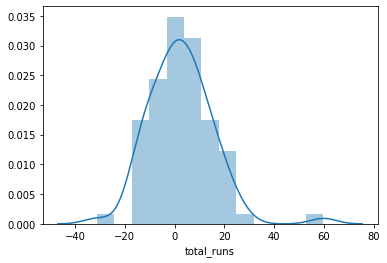

In [156]:
from sklearn import metrics
print(sns.distplot(y_test-prediction))
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))